### Decision Tree

##### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

##### loading dataset

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### EDA

In [3]:
df.shape

(600, 6)

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
for i in range(len(df['Taxable.Income'])):
    if df['Taxable.Income'][i] <= 30000:
        df['Taxable.Income'][i] = 'risky'
    else:
        df['Taxable.Income'][i] = 'good'

<ipython-input-6-f4f1cb848579>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][i] = 'good'
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-6-f4f1cb848579>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][i] = 'risky'


In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [8]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [9]:
df1 = pd.get_dummies(df)
df1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable.Income_good,Taxable.Income_risky,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,1,0,0,1
1,134075,18,0,1,1,0,0,1,0,0,1
2,160205,30,1,0,0,1,0,1,0,0,1
3,193264,15,0,1,0,0,1,1,0,0,1
4,27533,28,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,1,0,0,1
596,55369,2,0,1,1,0,0,1,0,0,1
597,154058,0,1,0,1,0,0,1,0,0,1
598,180083,17,0,1,0,1,0,1,0,1,0


In [11]:
df2= df1.drop('Marital.Status_Single', axis=1)
df3= df2.drop('Marital.Status_Divorced', axis=1)
df4= df3.drop('Undergrad_NO', axis=1)
df5= df4.drop('Urban_NO',axis=1)

In [12]:
df = df5.drop('Taxable.Income_good', axis=1)
df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Taxable.Income_risky,Urban_YES
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [13]:
df1=df.rename({'Undergrad_YES':'Undergrad','Marital.Status_Married':'Marital.Status','Urban_YES':'Urban','Taxable.Income_risky':'Taxable.Income'}, axis=1)
df1

,City.Population,Work.Experience,Undergrad,Marital.Status,Taxable.Income,Urban
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


### Data visualization

<AxesSubplot:>

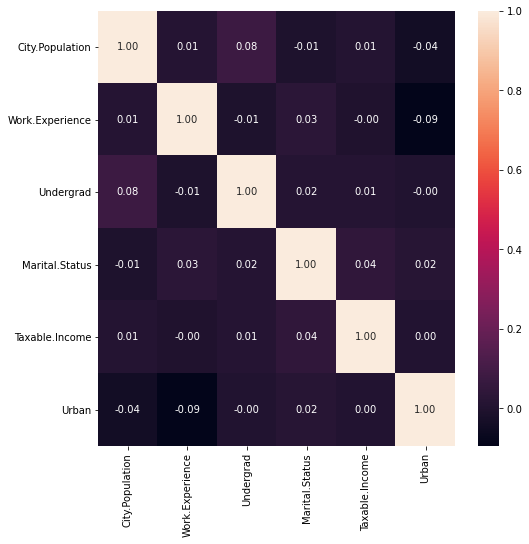

In [14]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')

##### Separate the independent and dependent variables

In [15]:
x=df1.iloc[:, [0,1,2,3,5]]
y=df1.iloc[:,4]

In [16]:
x

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: uint8

##### Splitting data into training and testing data set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

##### Train the model

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Plotting Decision tree

[Text(167.40000000000003, 190.26, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(234.36, 135.9, 'X[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'X[3] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.691\nsamples = 254\nvalue = [207, 47]'),
 Text(301.

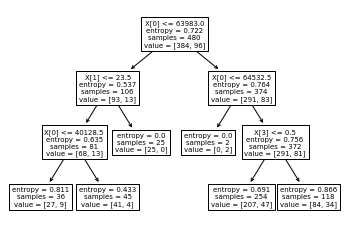

In [20]:
#PLot the decision tree
tree.plot_tree(model)

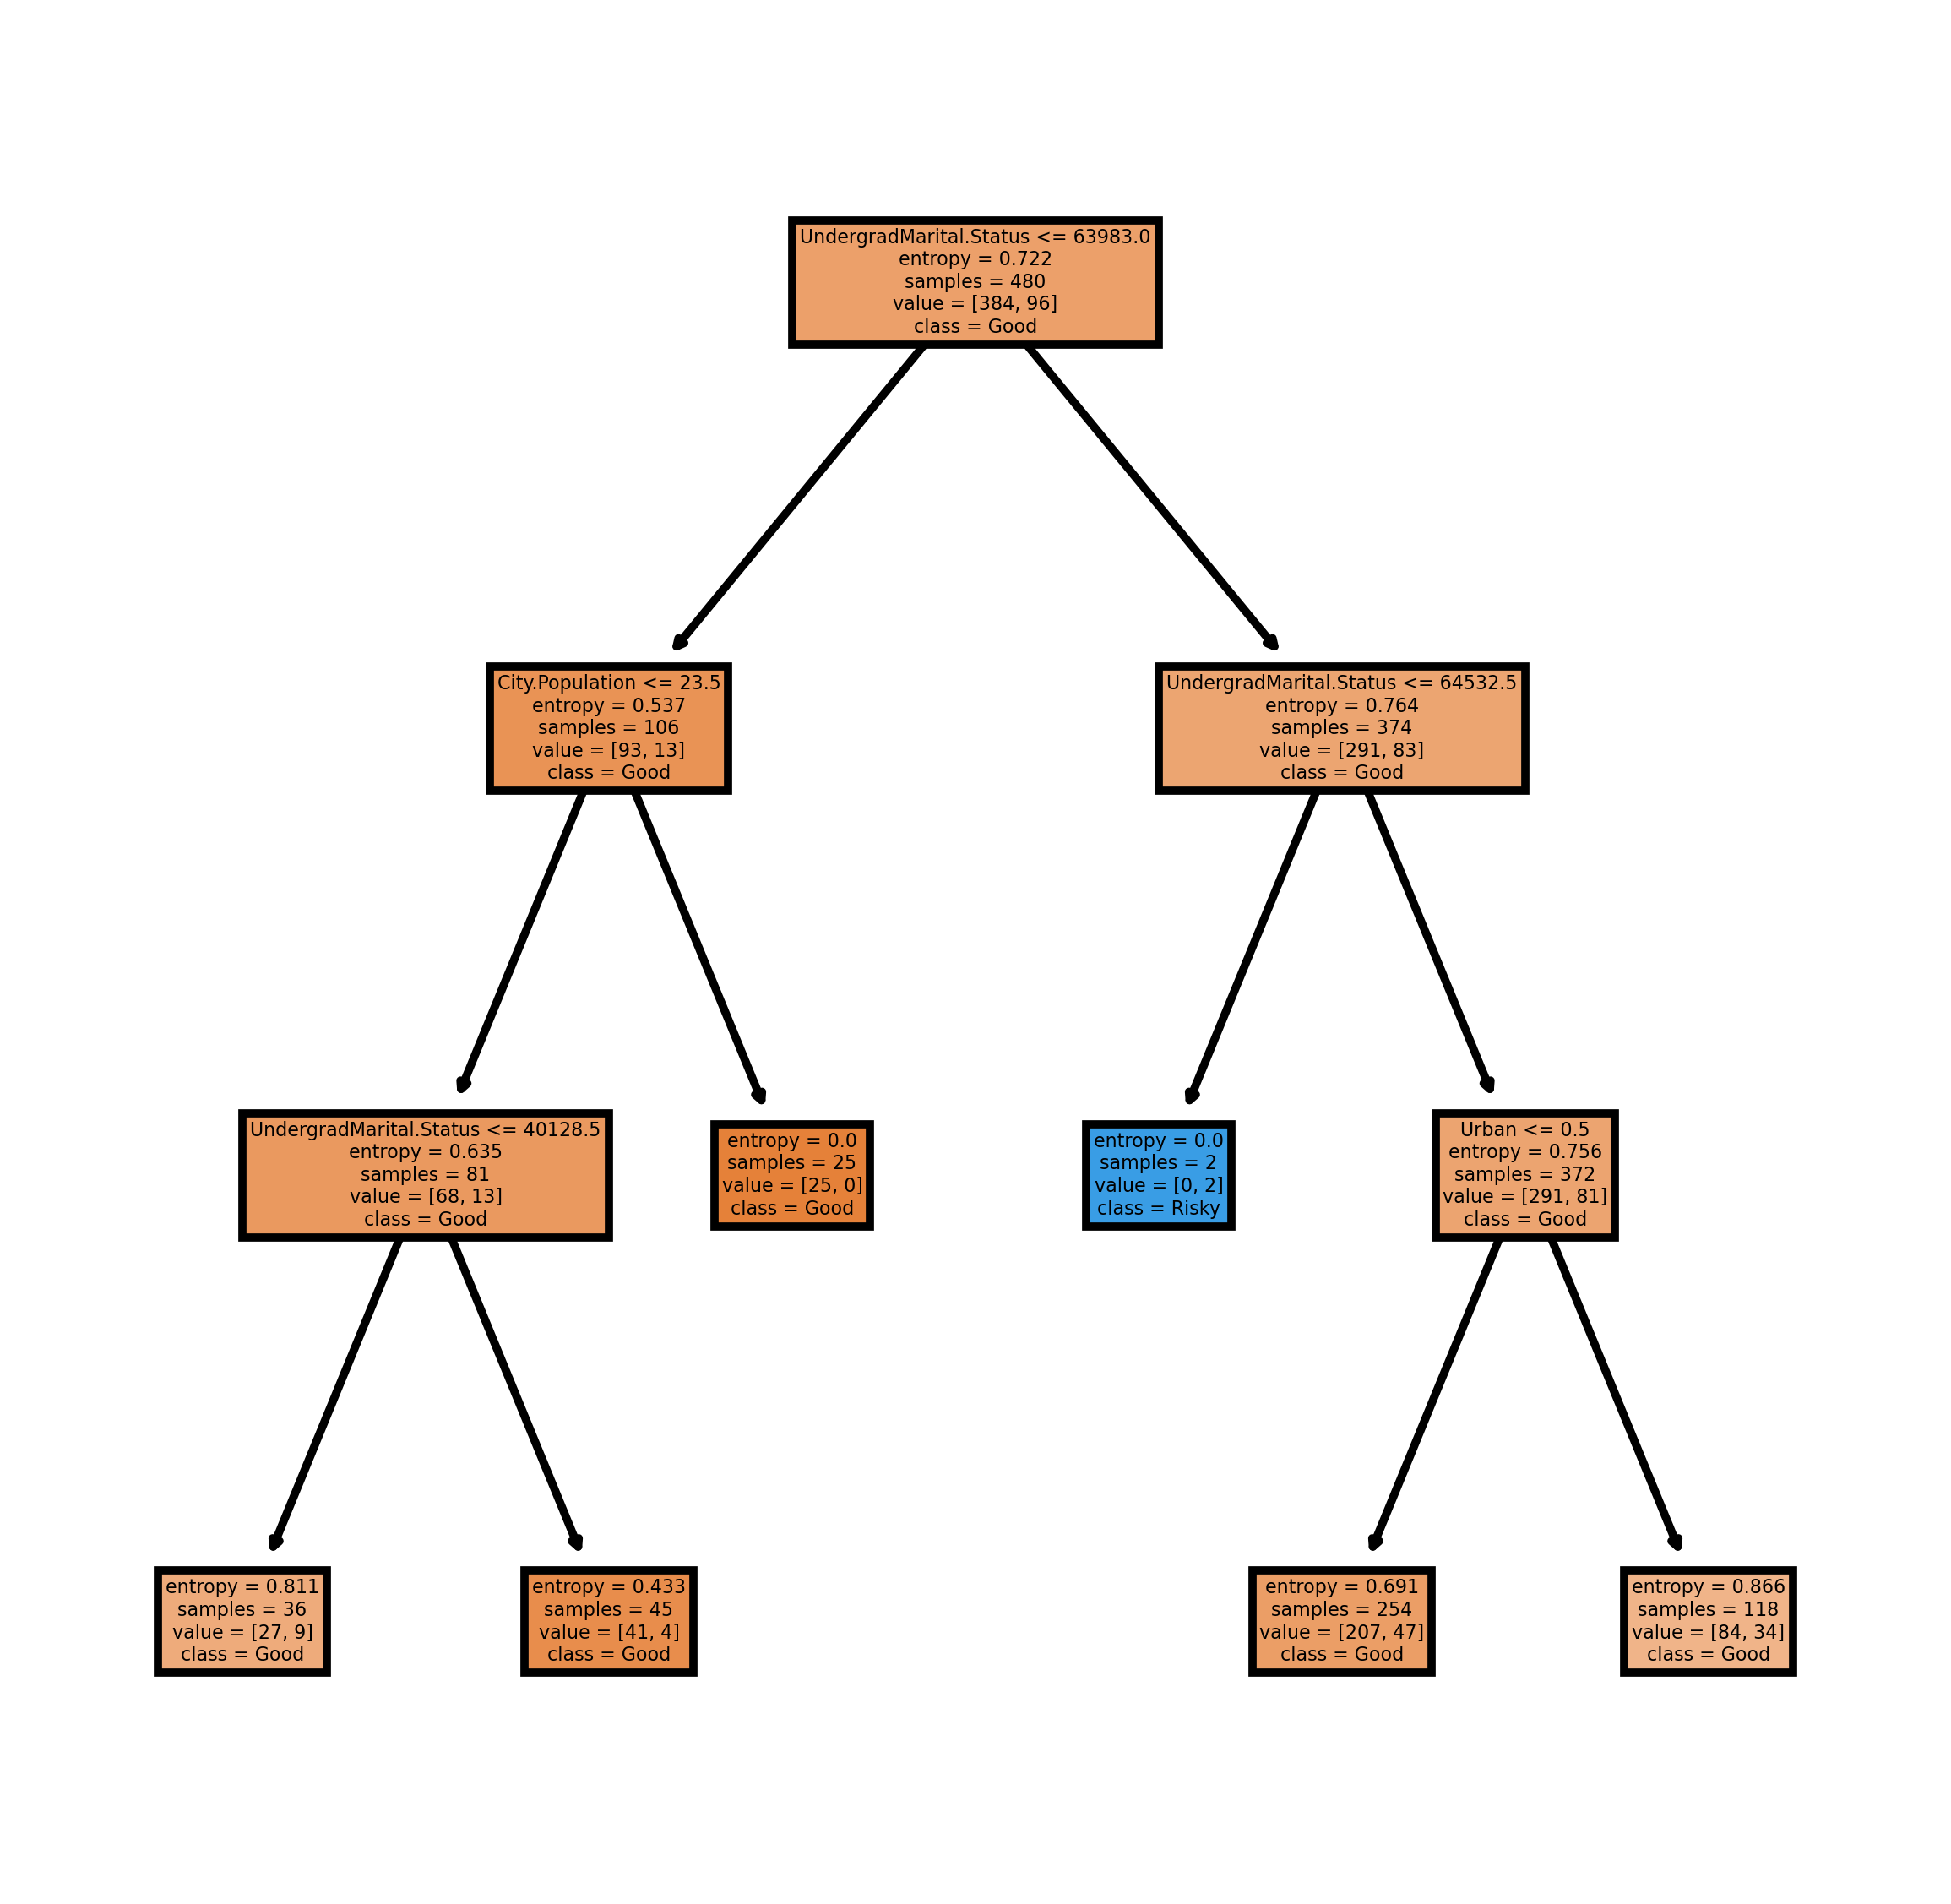

In [21]:
features = list(df1.columns[1:])
features
fn=['Undergrad''Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(model,feature_names = fn,                
               class_names=cn,               
               filled = True);

##### Predict the test dataset

In [22]:
preds = model.predict(x_test) # predicting on test data set by inputing it in model
pd.Series(preds).value_counts()

0    120
dtype: int64

In [23]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

##### Calculate the accuracy of the model

In [25]:
from sklearn.metrics import accuracy_score
print(("Accuracy is"), accuracy_score(y_test,preds)*100)

Accuracy is 76.66666666666667
